learning rate = 0.000001


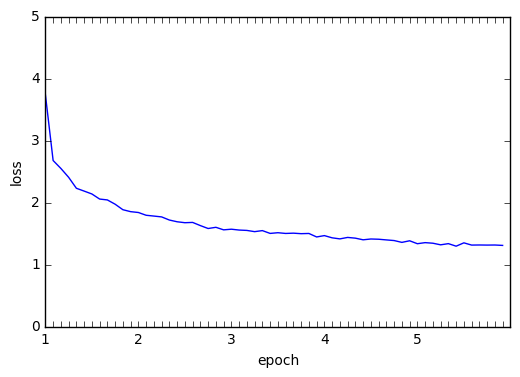

learning rate = 0.000010


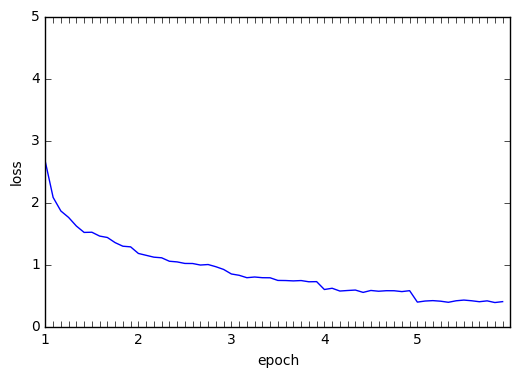

learning rate = 0.000050


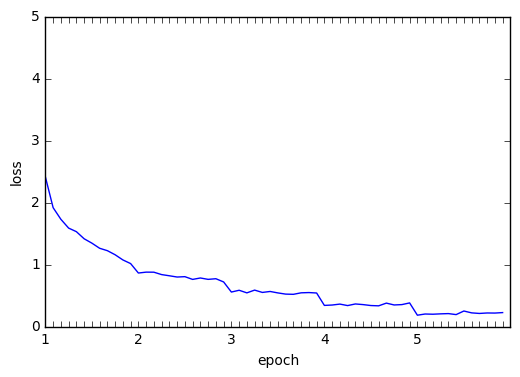

learning rate = 0.000100


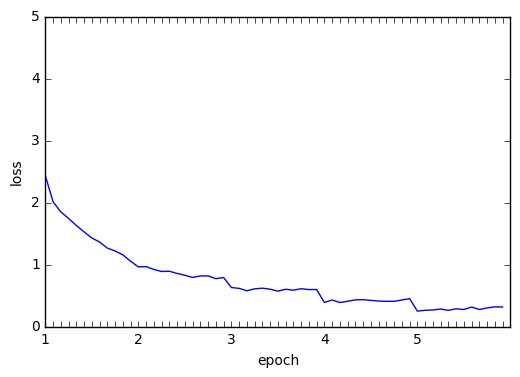

learning rate = 0.001000


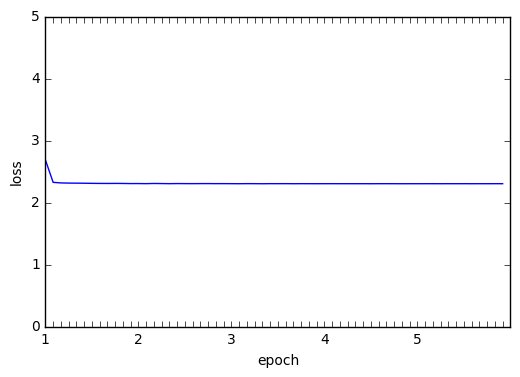

learning rate = 0.005000


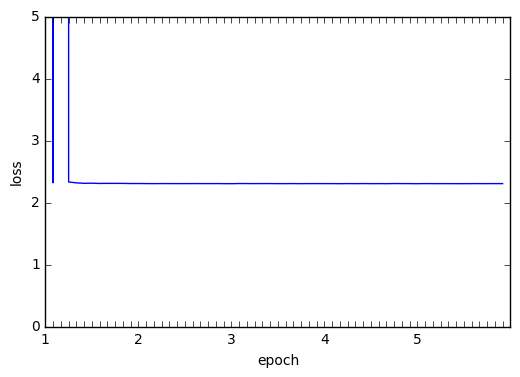

In [76]:
import matplotlib.pyplot as plt
import numpy as np

with open('results2.txt', 'r') as f:
    lines = f.readlines()
    
learning_rates = []
data = []
i = -1

for line in lines:
    line = line.rstrip()
    line = line.replace(" ", "")
    if (line[:2] == 'lr'):
        learning_rates.append(line[-8:])
        data.append([])
        i += 1
    else:
        data[i].append(line.split(','))

 
for i, lr in enumerate(learning_rates):
    print('learning rate = '+str(lr))
    losses = []
    epochs = []
    epoch_old = 0
    for index, loss in enumerate(data[i]):
        losses.append(loss[2])
        if (epoch_old != loss[0]): 
            epoch_old = loss[0]
            epochs.append(loss[0])
        else:
            epochs.append('')
        
    plt.plot(losses)
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.ylim(0.0, 5.0)
    x = range(len(losses))
    plt.xticks(x, epochs)
    
    plt.show()

Each tick on the x-axis stands for 1000 images trained on. We see that learning rates between 1e-5 and 1e-4 yield the lowest losses after five epochs, whereas bigger learning rates lead to the gradient descent being stuck in a local minimum. For lower learning rates, e.g. 1e-6, we take too much time to get to the minimum.

The observed kink in the loss at the epoch boundaries result from our chosen sampling rate of the loss (it is only plotted after every thousandth training image) so that there is an overhead of $n<1000$ images before the epoch boundary whose loss values are not plotted here but rather dragged along into the next epoch.